In [50]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys

sys.path.append("./scripts/")

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    import muon as mu
mu.set_options(display_style = "html", display_html_expand = 0b000);

In [51]:
%load_ext autoreload
%autoreload 2
from utils.interoperability import adata_to_mtx

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Data

In [52]:
file_path = "../data/qc_data/121c_adt_gex_qc.h5mu"
mdata = mu.read_h5mu(file_path)
mdata

/Users/djlisko/gitrepos/rhapsody-analysis-notebook/.venv/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/djlisko/gitrepos/rhapsody-analysis-notebook/.venv/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


adt:Cell_Type_Experimental,category,"Monocyte_classical,Monocyte_classical,Natural_kill..."
adt:Sample_Tag,category,"SampleTag12_hs,SampleTag07_hs,SampleTag03_hs,Sampl..."
adt:Sample_Name,category,"SampleTag12_hs,SampleTag07_hs,SampleTag03_hs,Sampl..."
adt:SampleTag01_hs_Read_Count,int64,"3,11,1,9,128,1,5,13,6,11,7,47,6,5,0,66,10,11,34,9,..."
adt:SampleTag02_hs_Read_Count,int64,"18,30,8,22,27,40,30,103,15,17,1,16,1,9,14,22,6,36,..."
adt:SampleTag03_hs_Read_Count,int64,"10,20,49,25,7286,23,19,24,10,29,12,39,0,4,2,6,1,17..."
adt:SampleTag04_hs_Read_Count,int64,"31,49,6,58,39,36,63,60,81,18,37,24,44,29,6,65,23,1..."
adt:SampleTag05_hs_Read_Count,int64,"3,13,5,1,17,0,20,25,3,10,5,2,4,18,16,43,11,1,1,3,4..."
adt:SampleTag06_hs_Read_Count,int64,"60,25,11,29,18,19,23,20,31,42,10,28,8,19,442,16,4,..."
adt:SampleTag07_hs_Read_Count,int64,"65,250,23,34,17,12,166,42,44,19,36,34,23,13,5,50,3..."
adt:SampleTag08_hs_Read_Count,int64,"8,16,12,40,130,26,13,241,8,24,111,7,20,19,15,15482..."


In [53]:
import os

In [54]:
data_path = "../data/"
if "tmp" not in os.listdir(data_path):
    tmp_path =  os.path.join(data_path, "tmp")
    os.mkdir(tmp_path)
adata_to_mtx(mdata["gex"], dir_path="../data/")

File saved to ../data/tmp


In [55]:
#TODO: I need to explain how this works

In [67]:
binomial_dev = pd.read_csv("../data/tmp/binomial.dev.csv", index_col=0)
binomial_dev.columns = binomial_dev.columns.str.replace(".", "_")
mdata["gex"].var = mdata["gex"].var.join(binomial_dev)

In [71]:
idx = list(mdata["gex"].var.binomial_dev.argsort())[::-1][:4000]
mask = np.zeros(mdata["gex"].var_names.shape, dtype=bool)
mask[idx] = True
mdata["gex"].var["highly_deviant"] = mask
mdata["gex"].var["binomial_deviance"] = binomial_dev.binomial_dev

In [78]:
sc.pp.highly_variable_genes(
    mdata["gex"], 
    layer="log1p_norm",
    min_mean=0.0125, 
    max_mean=3,
    min_disp=0.5
)

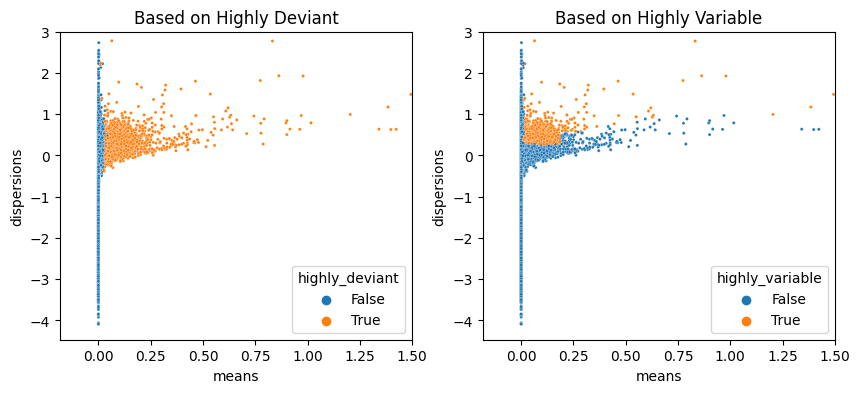

In [91]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.scatterplot(
    data=mdata["gex"].var, x="means", y="dispersions", hue="highly_deviant", s=5,
    ax=axs[0]
)

axs[0].set_title("Based on Highly Deviant")

sns.scatterplot(
    data=mdata["gex"].var, x="means", y="dispersions", hue="highly_variable", s=5,
    ax=axs[1]
)

axs[1].set_title("Based on Highly Variable")

for ax in axs:
    ax.set_xlim(None, 1.5)
    ax.set_ylim(None, 3)

plt.show()